In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [362]:
df = pd.read_csv('./valid.csv', header=None)
df.head()

,0,1,2,3,4,5
0,./labels/14.jpg,253,165,364,280,cube
1,./labels/14.jpg,387,314,486,413,cube
2,./labels/14.jpg,151,557,259,656,cube
3,./labels/14.jpg,272,630,371,687,cube
4,./labels/14.jpg,244,315,328,404,octagon


In [363]:
def get_unique(list_):
    temp_list = []
    
    for tt in list_:
        temp_list.append (tt.split('/')[-1])
        
    return np.unique(temp_list)

    
def cal_overlap (r1, r2, cls, th = 0.5):
    r1_x1 = r1[0]
    r1_y1 = r1[1]
    r1_x2 = r1[2]
    r1_y2 = r1[3]
    
    r2_x1 = r2[0]
    r2_y1 = r2[1]
    r2_x2 = r2[2]
    r2_y2 = r2[3]
    
    bg = np.zeros ((3000, 3000))
    
    bg[r2_y1:r2_y2, r2_x1:r2_x2] = 1
    bg_active = bg[r1_y1:r1_y2, r1_x1:r1_x2]
    
    temp = np.where (bg[r1_y1:r1_y2, r1_x1:r1_x2] == 1)
    area_whole = (r2_x2-r2_x1)*(r2_y2-r2_y1)
    
    
    ratio_ = len(temp[0])*1.0 / area_whole*1.0
    if ratio_ > th:
#         print ('ratio_: ', ratio_, ' (%d, %d)' % (len(temp), area_whole), ', cls: ', cls)
    
        return True
    return False

In [364]:
pid = get_unique(np.array(df[0]))

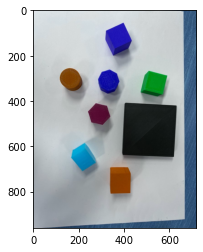

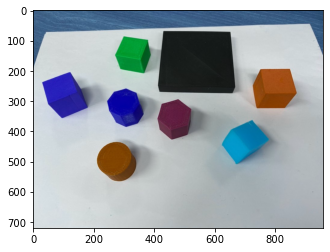

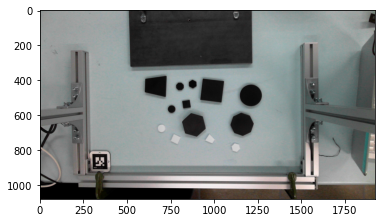

In [365]:
change_list = []

for pid_ in pid:
    
    
    img = cv2.imread('./labels/{}'.format(pid_))
    img_org = cv2.imread('./labels/{}'.format(pid_))
    plt.imshow(img)
    plt.show()
    
    info = df[df[0] == './labels/{}'.format(pid_)]
    info.head()
    
    list_info = []
    for i in info.values:
        list_info.append (i)
        img = cv2.rectangle(img.astype(np.float32), (i[1], i[2]), (i[3], i[4]), (255, 0, 0), 5)
        
    
#     print ('list_coord: ', list_coord)
    
    h, w, _ = img.shape

    n = 3
    for i in np.arange(0, h, h//n):

        if (i+(h//n)-1) > h:
            break
        for j in np.arange(0, w, w//n):            
            if (j+(w//n)-1) > w:
                break
            
#             plt.imshow(img.astype(np.uint8)[i:i+h//2,j:j+w//2])
#             plt.show()
            
            for k in list_info:
                r2_x1 = int(k[1])
                r2_y1 = int(k[2])
                r2_x2 = int(k[3])
                r2_y2 = int(k[4])
                
                is_overlap = cal_overlap ((j, i, j+w//2, i+h//2), (r2_x1, r2_y1, r2_x2, r2_y2), k[5])
                
                
                if is_overlap == True:
                    
                    offset_x1 = r2_x1 - j
                    offset_x2 = r2_x2 - j
                    
                    offset_y1 = r2_y1 - i                    
                    offset_y2 = r2_y2 - i
                    
                    
                    if offset_x1 < 0: offset_x1 = 0
                    if offset_y1 < 0: offset_y1 = 0
        
                    
                    
                    
                    
                    save_img = img_org[i:i+h//2,j:j+w//2]                     
                    height_save = save_img.shape[0]
                    width_save = save_img.shape[1]
                    
                    
                    if offset_y2 >= height_save:
                        offset_y2 = height_save - 1
                        
                    if offset_x2 >= width_save:
                        offset_x2 = width_save - 1
                    
                    
                    if offset_y2 >= height_save:
                        print ('off, height: %d, %d' % (offset_y2, height_save))
                        
                    
                    if offset_x2 >= width_save:
                        print ('off, width: %d, %d' % (offset_x2, width_save))
                        
                    name_ = '{}_ij_%d_%d.jpg'.format(k[0][:-4]) % (i,j)
                    change_list.append ([name_, offset_x1, offset_y1, offset_x2, offset_y2, k[5]])
                    cv2.imwrite ('./cropped/{}'.format(name_.split('/')[-1]), save_img)
    #break

In [366]:
save_img.shape

(540, 960, 3)

In [367]:
img.shape

(1080, 1920, 3)

In [368]:
change_list

[['./labels/14_ij_0_0.jpg', 253, 165, 359, 280, 'cube'],
 ['./labels/14_ij_0_0.jpg', 244, 315, 328, 404, 'octagon'],
 ['./labels/14_ij_0_0.jpg', 122, 318, 213, 388, 'cylinder'],
 ['./labels/14_ij_0_0.jpg', 196, 422, 300, 479, 'Hexagon'],
 ['./labels/14_ij_0_240.jpg', 13, 165, 124, 280, 'cube'],
 ['./labels/14_ij_0_240.jpg', 147, 314, 246, 413, 'cube'],
 ['./labels/14_ij_0_240.jpg', 4, 315, 88, 404, 'octagon'],
 ['./labels/14_ij_320_0.jpg', 151, 237, 259, 336, 'cube'],
 ['./labels/14_ij_320_0.jpg', 272, 310, 359, 367, 'cube'],
 ['./labels/14_ij_320_0.jpg', 244, 0, 328, 84, 'octagon'],
 ['./labels/14_ij_320_0.jpg', 122, 0, 213, 68, 'cylinder'],
 ['./labels/14_ij_320_0.jpg', 196, 102, 300, 190, 'Hexagon'],
 ['./labels/14_ij_320_240.jpg', 147, 0, 246, 93, 'cube'],
 ['./labels/14_ij_320_240.jpg', 32, 310, 131, 367, 'cube'],
 ['./labels/14_ij_320_240.jpg', 4, 0, 88, 84, 'octagon'],
 ['./labels/14_ij_320_240.jpg', 0, 102, 60, 190, 'Hexagon'],
 ['./labels/14_ij_320_240.jpg', 78, 102, 289, 297,

In [369]:
pd.DataFrame(data=change_list).to_csv('./train_crop.csv', index=False, header=False)